<a href="https://colab.research.google.com/github/Yasolvo/Conversion-File/blob/main/Convert_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convert PDF to word**


In [11]:
# Import module
from google.colab import files
# https://dashboard.groupdocs.cloud/files
import groupdocs_conversion_cloud

uploaded = files.upload()
try:
    for file in  uploaded.keys():

        # Get your app_sid and app_key at https://dashboard.groupdocs.cloud (free registration is required).

        app_sid = "cf8d77f7-3c96-420c-b6ce-b61b39b30dcb"

        app_key = "3eb3b7314a0bd1e0979a46d6ff5dd49c"

        # Create instance of the API

        convert_api = groupdocs_conversion_cloud.ConvertApi.from_keys(app_sid, app_key)

        file_api = groupdocs_conversion_cloud.FileApi.from_keys(app_sid, app_key)

        #file = 'file-sample_150kB.pdf'
        if '.pdf' in file:
            #upload source file to storage

            filename = str(file)

            remote_name = str(file)

            output_name= str(file).split('.p')[0]+'.docx'

            strformat='docx'

            request_upload = groupdocs_conversion_cloud.UploadFileRequest(remote_name,filename)

            response_upload = file_api.upload_file(request_upload)

            #Extract Text from PDF document

            settings = groupdocs_conversion_cloud.ConvertSettings()

            settings.file_path =remote_name

            settings.format = strformat

            settings.output_path = output_name

            request = groupdocs_conversion_cloud.ConvertDocumentRequest(settings)

            response = convert_api.convert_document(request)

            print("Document converted successfully: " + str(response))

except groupdocs_conversion_cloud.ApiException as e:

        print("Exception when calling get_supported_conversion_types: {0}".format(e.message))

Saving cv_expert.pdf to cv_expert.pdf
Document converted successfully: [{'name': 'cv_expert.docx',
 'path': 'cv_expert.docx',
 'size': 3253861,
 'url': 'https://api.groupdocs.cloud/v2.0/conversion/storage/file/cv_expert.docx'}]


# **Convert PDF to Excel**

### Méthode 1

In [24]:
# Import module
from google.colab import files
import groupdocs_conversion_cloud

uploaded = files.upload()
try:
    for file in  uploaded.keys():

        # Get your app_sid and app_key at https://dashboard.groupdocs.cloud (free registration is required).

        app_sid = "cf8d77f7-3c96-420c-b6ce-b61b39b30dcb"

        app_key = "3eb3b7314a0bd1e0979a46d6ff5dd49c"

        # Create instance of the API

        convert_api = groupdocs_conversion_cloud.ConvertApi.from_keys(app_sid, app_key)

        file_api = groupdocs_conversion_cloud.FileApi.from_keys(app_sid, app_key)

        #file = 'file-sample_150kB.pdf'
        if '.pdf' in file:
            #upload source file to storage

            filename = str(file)

            remote_name = str(file)

            output_name= str(file).split('.p')[0]+'.xlsx'

            strformat='xlsx'

            request_upload = groupdocs_conversion_cloud.UploadFileRequest(remote_name,filename)

            response_upload = file_api.upload_file(request_upload)

            #Extract Text from PDF document

            settings = groupdocs_conversion_cloud.ConvertSettings()

            settings.file_path =remote_name

            settings.format = strformat

            settings.output_path = output_name

            request = groupdocs_conversion_cloud.ConvertDocumentRequest(settings)

            response = convert_api.convert_document(request)

            print("Document converted successfully: " + str(response))

except groupdocs_conversion_cloud.ApiException as e:

        print("Exception when calling get_supported_conversion_types: {0}".format(e.message))

Saving 7.5 million offer.pdf to 7.5 million offer (3).pdf
Document converted successfully: [{'name': '7.5 million offer.xlsx',
 'path': '7.5 million offer.xlsx',
 'size': 29535,
 'url': 'https://api.groupdocs.cloud/v2.0/conversion/storage/file/7.5 million '
        'offer.xlsx'}]


### Méthode 2

In [12]:
pdf_folder=Path('pdf_folder')
os.makedirs(pdf_folder)

In [13]:
from os import walk
mypath='./pdf_folder'
_, _, filenames = next(walk(mypath))
filenames

[]

In [ ]:
import tabula
import pandas as pd

for file in filenames:
    # convert PDF into CSV file
    df=tabula.convert_into(file, "output.csv", output_format="csv", pages='all')

    df = pd.read_csv ('output.csv')
    os.remove('output.csv')
    df.to_excel(str(file).split('.p')[0]+'.xlsx')

## **Convert Image to Word**

In [3]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract

In [9]:
!pip install tesseract

     |████████████████████████████████| 45.6MB 87kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp37-none-any.whl size=45562571 sha256=a56f86c5fd33ed5ac94df91d0d107264ae7deea1f9b457f8b09bee08a228a882
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


In [13]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,679 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [14]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [32]:
from IPython.display import Image
from pytesseract import image_to_string
from google.colab import files
import PIL.Image

uploaded = files.upload()

for file in uploaded.keys():
  with open(str(file).split('.')[0]+'.txt', 'w') as f:
    f.write(image_to_string(PIL.Image.open(file)))
  
  files.download(str(file).split('.')[0]+'.txt')

Saving image.png to image (14).png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
!pip install groupdocs_conversion_cloud

     |████████████████████████████████| 368kB 8.0MB/s 


In [19]:
# Import module
from google.colab import files
import groupdocs_conversion_cloud

uploaded = files.upload()
try:
    for file in  uploaded.keys():

        # Get your app_sid and app_key at https://dashboard.groupdocs.cloud (free registration is required).

        app_sid = "2604a103-82d4-40c3-a704-37a586836e53"

        app_key = "30e02215d19ef5d6818ce64585578a3e"

        # Create instance of the API

        convert_api = groupdocs_conversion_cloud.ConvertApi.from_keys(app_sid, app_key)

        file_api = groupdocs_conversion_cloud.FileApi.from_keys(app_sid, app_key)

        #file = 'file-sample_150kB.pdf'
        if '.txt' in file:
            #upload source file to storage
           
            filename = str(file)

            remote_name = str(file)

            output_name= str(file).split('.t')[0]+'.docx'

            strformat='.docx'

            request_upload = groupdocs_conversion_cloud.UploadFileRequest(remote_name,filename)

            response_upload = file_api.upload_file(request_upload)

            #Extract Text from PDF document

            settings = groupdocs_conversion_cloud.ConvertSettings()

            settings.file_path =remote_name

            settings.format = strformat

            settings.output_path = output_name

            request = groupdocs_conversion_cloud.ConvertDocumentRequest(settings)

            response = convert_api.convert_document(request)

            print("Document converted successfully: " + str(response))

except groupdocs_conversion_cloud.ApiException as e:

        print("Exception when calling get_supported_conversion_types: {0}".format(e.message))

Saving image_to_text.txt to image_to_text (2).txt
Document converted successfully: [{'name': 'image_to_text.docx',
 'path': 'image_to_text.docx',
 'size': 6891,
 'url': 'https://api.groupdocs.cloud/v2.0/conversion/storage/file/image_to_text.docx'}]


## **Convert Image to Excel**

Créez un dossier nommé img_folder Le format de l'image doit être * .png.
Téléchargez l'image dans le dossier img_folder Runtime> Tout exécuter ou appuyez sur Ctrl F9. Faites défiler vers le bas, attendez que l'application se termine Télécharger le fichier excel_folder.zip

Youtube
https://youtu.be/TapPezyA2Ao

In [3]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


### **Preferences**

https://gist.github.com/soiqualang/9024becf6e6b6321601b61e53bbcab6c

https://towardsdatascience.com/a-table-detection-cell-recognition-and-text-extraction-algorithm-to-convert-tables-to-excel-files-902edcf289ec

https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i

https://www.pyimagesearch.com/2017/07/10/using-tesseract-ocr-python/

https://nanonets.com/blog/ocr-with-tesseract/

Installez tesseract
https://github.com/tesseract-ocr/tesseract/wiki

In [4]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=9d47f047c642ae85325dd2ad18413fd09b3c02f614a46058dd4e3c06eae8b4dd
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [5]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install tesseract
!pip install tesseract-ocr
!pip install xlsxwriter

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,032 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [6]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

import os
from pathlib import Path
import subprocess

In [7]:

def getFname(path):

    if('/' in path):
        arr1=path.split('/')
    else:
        arr1=path.split('\\')
    return arr1[len(arr1)-1].replace(".png", ".xlsx")

def image2excel(imgfile,excelfile):

    try:
        from PIL import Image
    except ImportError:
        import Image
    import pytesseract

    #read your file
    file=imgfile
    img = cv2.imread('img_folder/'+file,0)
    img.shape

    #thresholding the image to a binary image
    thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    #inverting the image 
    img_bin = 255-img_bin
    cv2.imwrite('tmp/cv_inverted.png',img_bin)
    #Plotting the image to see the output
    plotting = plt.imshow(img_bin,cmap='gray')
    # plt.show()

    # countcol(width) of kernel as 100th of total width
    kernel_len = np.array(img).shape[1]//100
    # Defining a vertical kernel to detect all vertical lines of image 
    ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
    # Defining a horizontal kernel to detect all horizontal lines of image
    hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
    # A kernel of 2x2
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

    #Use vertical kernel to detect and save the vertical lines in a jpg
    image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
    vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
    cv2.imwrite("tmp/vertical.png",vertical_lines)
    #Plot the generated image
    plotting = plt.imshow(image_1,cmap='gray')
    # plt.show()

    #Use horizontal kernel to detect and save the horizontal lines in a jpg
    image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
    horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
    cv2.imwrite("tmp/horizontal.png",horizontal_lines)
    #Plot the generated image
    plotting = plt.imshow(image_2,cmap='gray')
    # plt.show()

    # Combine horizontal and vertical lines in a new third image, with both having same weight.
    img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
    #Eroding and thesholding the image
    img_vh = cv2.erode(~img_vh, kernel, iterations=2)
    thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite("tmp/img_vh.png", img_vh)
    bitxor = cv2.bitwise_xor(img,img_vh)
    bitnot = cv2.bitwise_not(bitxor)
    #Plotting the generated image
    plotting = plt.imshow(bitnot,cmap='gray')
    # plt.show()

    # Detect contours for following box detection
    contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    def sort_contours(cnts, method="left-to-right"):
        # initialize the reverse flag and sort index
        reverse = False
        i = 0
        # handle if we need to sort in reverse
        if method == "right-to-left" or method == "bottom-to-top":
            reverse = True
        # handle if we are sorting against the y-coordinate rather than
        # the x-coordinate of the bounding box
        if method == "top-to-bottom" or method == "bottom-to-top":
            i = 1
        # construct the list of bounding boxes and sort them from top to
        # bottom
        boundingBoxes = [cv2.boundingRect(c) for c in cnts]
        (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
        # return the list of sorted contours and bounding boxes
        return (cnts, boundingBoxes)

    # Sort all the contours by top to bottom.
    contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

    #Creating a list of heights for all detected boxes
    heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

    #Get mean of heights
    mean = np.mean(heights)

    #Create list box to store all boxes in  
    box = []
    # Get position (x,y), width and height for every contour and show the contour on image
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if (w<1000 and h<500):
            image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            box.append([x,y,w,h])
            
    plotting = plt.imshow(image,cmap='gray')
    # plt.show()

    #Creating two lists to define row and column in which cell is located
    row=[]
    column=[]
    j=0

    #Sorting the boxes to their respective row and column
    for i in range(len(box)):    
            
        if(i==0):
            column.append(box[i])
            previous=box[i]    
        
        else:
            if(box[i][1]<=previous[1]+mean/2):
                column.append(box[i])
                previous=box[i]            
                
                if(i==len(box)-1):
                    row.append(column)        
                
            else:
                row.append(column)
                column=[]
                previous = box[i]
                column.append(box[i])
                
    # print(column)
    # print(row)

    #calculating maximum number of cells
    countcol = 0
    for i in range(len(row)):
        countcol = len(row[i])
        if countcol > countcol:
            countcol = countcol

    #Retrieving the center of each column
    center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

    center=np.array(center)
    center.sort()
    # print(center)
    #Regarding the distance to the columns center, the boxes are arranged in respective order

    finalboxes = []
    for i in range(len(row)):
        lis=[]
        for k in range(countcol):
            lis.append([])
        for j in range(len(row[i])):
            diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
            minimum = min(diff)
            indexing = list(diff).index(minimum)
            lis[indexing].append(row[i][j])
        finalboxes.append(lis)


    #from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
    outer=[]
    for i in range(len(finalboxes)):
        for j in range(len(finalboxes[i])):
            inner=''
            if(len(finalboxes[i][j])==0):
                outer.append(' ')
            else:
                for k in range(len(finalboxes[i][j])):
                    y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                    finalimg = bitnot[x:x+h, y:y+w]
                    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                    border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                    resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                    dilation = cv2.dilate(resizing, kernel,iterations=1)
                    erosion = cv2.erode(dilation, kernel,iterations=2)
                    
                    out = pytesseract.image_to_string(erosion)
                    if(len(out)==0):
                        out = pytesseract.image_to_string(erosion, config='--psm 3')
                    inner = inner +" "+ out
                outer.append(inner)

    #Creating a dataframe of the generated OCR list
    arr = np.array(outer)
    dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
    print(dataframe)
    data = dataframe.style.set_properties(align="left")
    #Converting it in a excel-file
    data.to_excel(excelfile, engine='xlsxwriter', encoding="ascii")

In [8]:
img_folder=Path('img_folder')
excel_folder=Path('excel_folder')
tmp=Path('tmp')

# supprimer zip file
if os.path.exists('excel_folder.zip'):
    !rm excel_folder.zip

if os.path.exists(excel_folder):
    !rm -r excel_folder
    os.makedirs(excel_folder)
else:
    os.makedirs(excel_folder)
if os.path.exists(tmp):
    !rm -r tmp
    os.makedirs(tmp)
else:
    os.makedirs(tmp)

In [10]:
for fdir in img_folder.glob('img_folder/*.png'):
    fname=getFname(str(fdir))
    print('-----------')
    print('convert %s...' % (fname))    
    image2excel(str(fdir),str(excel_folder)+'/'+str(fname))

cmd='zip -r excel_folder.zip '+str(excel_folder)
p1 = subprocess.Popen(cmd,shell=True)
p1.wait()

0

           0  ...                                     4
0             ...   Fréquence\nrelative cumulée\n(%)\n
1      12\n  ...                                     
2      13\n  ...                               30,6\n
3      14\n  ...                               50,0\n
4      i5\n  ...                               75,0\n
5      16\n  ...                               86,1\n
6      17\n  ...                               97,2\n
7      18\n  ...                              100,0\n
8   Total\n  ...                                 aK\n
9            ...                                     

[10 rows x 5 columns]


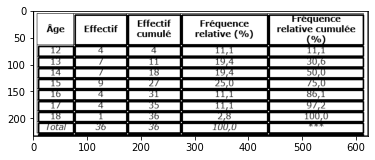

In [11]:
image2excel('m1364i10.png','m1364i10.xlsx')
#image2excel('tableau_conv.png','tableau_conv.xlsx')